# Sentiment Analysis on Twitter Data using Bag of Words (BoW) and Logistic Regression


## Introduction
This notebook performs sentiment analysis on Twitter data using the Bag of Words approach with logistic regression. It aims to predict the sentiment (positive, negative, neutral) of tweets.


## Setup
Import the necessary libraries:
- numpy: for numerical operations
- pandas: for data manipulation and analysis
- os: for interacting with the operating system

In [ ]:
import numpy as np
import pandas as pd
import os

In [2]:
train = pd.read_csv(r"C:\Users\VAGDEVI\Downloads\twitter_training.csv")
train


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
train.columns=['id','information','type','text']
train

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
val = pd.read_csv(r"C:\Users\VAGDEVI\Downloads\twitter_validation.csv")
val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Data Preprocessing
Preprocess the text data by:
- Converting the text to lowercase using the `lower` method.
- Removing special characters and symbols using regular expressions (`re` library).

In [7]:
import re #Regular expressions
#Text transformation
train["lower"]=train.text.str.lower() #lowercase
train["lower"]=[str(data) for data in train.lower] #converting all to string
train["lower"]=train.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val["lower"]=val.text.str.lower() #lowercase
val["lower"]=[str(data) for data in val.lower] #converting all to string
val["lower"]=val.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [8]:
train.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


## Tokenization
Tokenize the preprocessed text data into individual words using the `word_tokenize` function from the `nltk` library.

In [9]:

import nltk
from nltk import word_tokenize
nltk.download('stopwords')
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VAGDEVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of tokens:  30436


## Stopword Removal
Remove English stopwords from the tokenized text data using the stopwords from the `nltk` corpus.

In [10]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')

## Bag of Words Representation
Create a Bag of Words (BoW) representation of the tokenized text data using the `CountVectorizer` class from scikit-learn. Set the tokenizer to `word_tokenize` and specify the n-gram range as `(1, 1)` for analyzing individual words.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

## Train-Test Split
Split the training data into training and testing sets using the `train_test_split` function from scikit-learn. We split 80% for training and 20% for testing.

In [27]:
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train, test_size=0.2, random_state=0)

In [13]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

C:\Users\VAGDEVI\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [14]:
X_test_bow

<14937x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 161164 stored elements in Compressed Sparse Row format>

In [15]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [16]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.301399
Positive      0.281717
Neutral       0.244895
Irrelevant    0.171989
Name: type, dtype: float64

# Logistic Regression

The logistic regression model assumes a linear relationship between the independent variables and the log-odds of the dependent variable. The log-odds, also known as the logit function, is transformed using the sigmoid or logistic function, which maps any real-valued input to a value between 0 and 1. This sigmoid function allows us to interpret the output of the logistic regression model as probabilities.

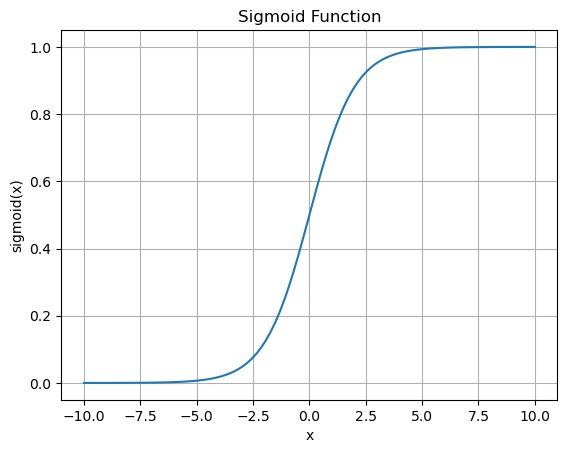

In [17]:
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.32329115618933


In [18]:
#Validation data
X_val_bow = bow_counts.transform(val.lower)
y_val_bow = val['type']

In [19]:
X_val_bow

<999x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 12893 stored elements in Compressed Sparse Row format>

In [20]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.1931931931932


In [21]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val.lower)

In [22]:
X_train_bow

<59744x1428316 sparse matrix of type '<class 'numpy.int64'>'
	with 4142525 stored elements in Compressed Sparse Row format>

In [23]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.975430139921


In [25]:
y_val_bow = val['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.8988988988989


## Conclusion
The notebook demonstrates the application of the Bag of Words approach and logistic regression for sentiment analysis on Twitter data. It provides insights into the accuracy of the model in predicting sentiment labels.